In [ ]:
!pip install opencv-python
!sudo pip install pycrypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 446 kB 7.4 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=7e2bc6fd0980be4726a397753a9c60eca8ad79b5bac6b879095d178f83d96ade
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import glob
import base64
import hashlib 
import numpy as np
import pandas as pd
from zipfile import ZipFile
from datetime import datetime
from skimage import img_as_ubyte
from skimage.filters import gaussian
from google.colab.patches import cv2_imshow

from keras.models import Sequential 
import tensorflow.compat.v1 as tf
import tensorflow_datasets as tfds
tf.disable_v2_behavior()
# tf.enable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


# **ENCRYPTION**

In [ ]:
total_img=[]
count = 0

filename1 = os.listdir("/content/drive/MyDrive/OTA_DATASET")
print(len(filename1))
print(filename1,end="\n\n")

for i in sorted(filename1):
  filename2 = os.listdir(f"/content/drive/MyDrive/OTA_DATASET/{i}")
  print(len(filename2))
  print(filename2,end="\n\n")
  if "log.csv" in filename2:
    filename2.remove("log.csv")
  for j in sorted(filename2):
    filename3 = os.listdir(f"/content/drive/MyDrive/OTA_DATASET/{i}/{j}")
    print(len(filename3))
    print(filename3,end="\n\n")
    for k in sorted(filename3):
      print(k)
      total_img.append(f"/content/drive/MyDrive/OTA_DATASET/{i}/{j}/{k}")
      count += 1

2
['benign', 'malicious']

5
['log.csv', 'lanczos_300', 'nearest_120', 'lanczos_120', 'nearest_300']

61
['7z1900_lanczos_120_.png', 'AOMEIBackupperStd_lanczos_120_.png', 'AutoHotkey_1.1.33.02_setup_lanczos_120_.png', 'Boxcryptor_v2.42.1333_Setup_lanczos_120_.png', 'ChromeSetup_lanczos_120_.png', 'DSOne_lanczos_120_.png', 'OneDriveSetup_lanczos_120_.png', 'MultiCommander_x64_(10.2.0.2745)_lanczos_120_.png', 'Setup-Trelby-2.2_lanczos_120_.png', 'VirtualBox-6.1.16-140961-Win_lanczos_120_.png', 'DropboxInstaller_lanczos_120_.png', 'FSViewerSetup75_lanczos_120_.png', 'FoxitPhantomPDF1011_enu_Setup_Website_lanczos_120_.png', 'MYKI-latest_lanczos_120_.png', 'FileSeekSetup-6.4_lanczos_120_.png', 'KindleForPC-installer-1.30.59056_lanczos_120_.png', 'DiscordSetup_lanczos_120_.png', 'SPAMfighter_web_lanczos_120_.png', 'IDriveWinSetup_lanczos_120_.png', 'Firefox Installer_lanczos_120_.png', 'ShareX-13.4.0-setup_lanczos_120_.png', 'HandBrake-1.3.3-x86_64-Win_GUI_lanczos_120_.png', 'Evernote-10.5.7

In [ ]:
print(total_img)

['/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/7z1900_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/AOMEIBackupperStd_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/AutoHotkey_1.1.33.02_setup_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/Boxcryptor_v2.42.1333_Setup_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/ChromeSetup_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DSOne_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DiscordSetup_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DropboxInstaller_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/Evernote-10.5.7-2171-setup_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/FSViewerSetup75_lanczos_120_.png', '/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/FileSeekSetup-6.4_lanczos_120_.pn

In [ ]:
print(count)

545


In [ ]:
for i in total_img:
  print(i)

/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/7z1900_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/AOMEIBackupperStd_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/AutoHotkey_1.1.33.02_setup_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/Boxcryptor_v2.42.1333_Setup_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/ChromeSetup_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DSOne_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DiscordSetup_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/DropboxInstaller_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/Evernote-10.5.7-2171-setup_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/FSViewerSetup75_lanczos_120_.png
/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/FileSeekSetup-6.4_lanczos_120_.png
/content/drive/MyDrive/OTA_DAT

In [ ]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/OTA_DATASET/benign/lanczos_120/7z1900_lanczos_120_.png')
width, height = im.size

print("Width :",width)
print("Height :",height)

Width : 510
Height : 503


In [ ]:
# Reading input Image and encoding it using base64
index = 0
i=0
strings = [None]*count

for img_path in total_img:
  with open(img_path, "rb") as img_file:
    BI = base64.b64encode(img_file.read())
  index += 1
  BI = BI.decode("utf-8")
  strings[i] = BI
  i += 1

In [ ]:
for i in range(index):
  print(strings[i])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(index)

545


In [ ]:
# My key
K = ""
f = open('/content/key.txt','r')
for i in f:
    K += i
f.close()
K

'hello world, this is my key'

In [ ]:
SK = hashlib.sha256(K.encode())
print("The hexadecimal equivalent of SHA256 is : ") 
print(SK.hexdigest())

The hexadecimal equivalent of SHA256 is : 
0ee0e7680375a7d75f563f692fcb2a0b9ef56f749ee46f68744e54cd29e535f3


In [ ]:
# AES 256 in OFB mode:
from Crypto.Cipher import AES
from Crypto.Random import new as Random
from hashlib import sha256
from base64 import b64encode,b64decode
s=0

class AESCipher:
    def __init__(self,data,key):
        self.block_size = 16
        self.data = data
        self.key = sha256(key.encode()).digest()[:32]
        self.pad = lambda s:(s + (self.block_size - len(s) % self.block_size) * chr (self.block_size - len(s) % self.block_size))
        self.unpad = lambda s: s[:-ord(s[len(s) - 1:])]

    def encrypt(self):
        plain_text = self.pad(self.data)
        iv = Random().read(AES.block_size)
        cipher = AES.new(self.key,AES.MODE_OFB,iv)
        return b64encode(iv + cipher.encrypt(plain_text.encode())).decode()

In [ ]:
tp = []

def utf8len(a):
    return len(a.encode('utf-8'))

In [ ]:
# Encrypting image using base 64 encoded text and hashed key - SHA256
# AES-256
#getting encryption time
ci = []
et = []
et_s = 0 
et_a = 0
tp_s = 0

for i in range(index):
  e_entry = datetime.today()  
  e_s1 = e_entry.timestamp()
  # print(e_s1)
  ci.append(AESCipher(strings[i],SK.hexdigest()).encrypt())
  li = AESCipher(strings[i],SK.hexdigest()).encrypt()

  e_exit = datetime.today()  
  e_s2 = e_exit.timestamp()
  # print(e_s2)

  d_e = e_s2-e_s1
  tp_s=tp_s+(utf8len(li)/d_e)
  tp.append(tp_s)
  et_s+=d_e
  et.append(d_e)

et_a = et_s/(index-1)
print("Encryption time = ",et_a)
print("Encryption Time of all images",et)
print("Throughput :",tp)
thp = tp_s/(index-1)
print("Average of Throughput :",tp_s/(index-1))

Encryption time =  0.06482909006230972
Encryption Time of all images [0.08666586875915527, 0.062026023864746094, 0.08013796806335449, 0.0849909782409668, 0.07516694068908691, 0.09678387641906738, 0.06461095809936523, 0.09887504577636719, 0.07402992248535156, 0.062174081802368164, 0.04832005500793457, 0.045324087142944336, 0.06250500679016113, 0.06319999694824219, 0.028570890426635742, 0.06485199928283691, 0.06087207794189453, 0.032865047454833984, 0.04063701629638672, 0.042613983154296875, 0.054019927978515625, 0.03209400177001953, 0.0913841724395752, 0.07086586952209473, 0.061827898025512695, 0.038339853286743164, 0.0820000171661377, 0.04962611198425293, 0.04162192344665527, 0.019479990005493164, 0.03661918640136719, 0.10372805595397949, 0.06011819839477539, 0.05527496337890625, 0.019483089447021484, 0.01910114288330078, 0.07515192031860352, 0.026211977005004883, 0.02583909034729004, 0.021929025650024414, 0.02195906639099121, 0.019338130950927734, 0.07343196868896484, 0.03672099113464

In [ ]:
print(len(ci))

545


In [ ]:
w = 255
h = len(K)

print("Weight of blank image : ", w)
print("Height of blank image : ", h)

Weight of blank image :  255
Height of blank image :  27


In [ ]:
# creating new Image C of size(w,h) 
# initializing as blank

C = np.ones((h,w,1), dtype = 'uint8')

In [ ]:
# Filling pixels in C
for i in range(h):
    j = ord(K[i])
    for k in range(w):
        if k < j:
            C[i][k][0] = 0
        else:
            break

In [ ]:
# Dividing C into R and P
# initializing R and P of same size as C
R = np.ones((h,w,3), dtype = 'uint8')
P = np.ones((h,w,3), dtype = 'uint8')

In [ ]:
# filling the pixels of R
for i in range(h):
    for j in range(w):
        r = np.random.normal(0,1,1)
        R[i][j][0] = r

In [ ]:
# filling the pixels of P
for i in range(h):
    for j in range(w):
        p = R[i][j][0] ^ C[i][j][0]
        P[i][j][0] = p

In [ ]:
filename = '/content/R.png'
cv2.imwrite(filename, R)

True

In [ ]:
from PIL import Image

im = Image.open('/content/R.png')
width, height = im.size

print("Width :",width)
print("Height :",height)

Width : 255
Height : 27


In [ ]:
filename = '/content/P.png'
cv2.imwrite(filename, P)

True

In [ ]:
from PIL import Image

im = Image.open('/content/P.png')
width, height = im.size

print("Width :",width)
print("Height :",height)

Width : 255
Height : 27


In [ ]:
# z is for prediction
zdf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in C:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
zdf['1'] = a
zdf['2'] = b

In [ ]:
zdf

,1,2
0,76.0,75.0
1,77.0,77.0
2,74.0,73.0
3,74.0,73.0
4,72.0,72.0
5,112.0,111.0
6,68.0,68.0
7,72.0,72.0
8,71.0,70.0
9,74.0,73.0


In [ ]:
xdf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in P:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
xdf['1'] = a
xdf['2'] = b

In [ ]:
xdf

,1,2
0,6423.0,3885.0
1,4142.0,6667.0
2,3625.0,3885.0
3,4651.0,6163.0
4,5658.0,4134.0
5,5436.0,4166.0
6,7179.0,8458.0
7,5151.0,5659.0
8,6168.0,5406.0
9,4905.0,5146.0


In [ ]:
ydf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in R:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
ydf['1'] = a
ydf['2'] = b

In [ ]:
ydf

,1,2
0,6395.0,3840.0
1,4103.0,6646.0
2,3599.0,3842.0
3,4617.0,6136.0
4,5628.0,4098.0
5,5378.0,4093.0
6,7157.0,8430.0
7,5117.0,5623.0
8,6137.0,5378.0
9,4867.0,5121.0


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Score :  0.9999239681719937


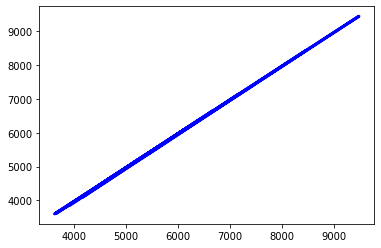

In [ ]:
LRmodel = LinearRegression()
LRmodel.fit(xdf,ydf)
print("Score : ",LRmodel.score(xdf,ydf))
plt.plot(xdf, ydf, color="blue", linewidth=3)

In [ ]:
predict = LRmodel.predict([[sum(zdf['1']),sum(zdf['2'])]])
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[2146.82171346, 2130.58476568]])

In [ ]:
x = round(predict[0][0])%26
y = round(predict[0][1])%26

print("X :",x)
print("Y :",y)

X : 15
Y : 25


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Ciphertext"
ch = [0 for i in range(index)]
# txt = [] 
# text = ""

for i in range(index):
  txt = [] 
  text = ""
  for each in ci[i]:
       ch[i] = ord(each) + x - y
       txt.append(int(ch[i]))
  for t in txt:
     text += chr(t) + " "
  f = open(path+"/"+str(i+1)+".txt", 'w')
  f.write(text)
  f.close()


# **ENCRYPTION HASHING**

In [ ]:
# encrypt = []
# filename = os.listdir("/content/drive/MyDrive/OTA_DATASET")

# for i in sorted(filename):
#   with open("/content/drive/MyDrive/OTA_DATASET/"+i,'rb') as e: 
#     bytes = e.read() 
#     hashencrypt = hashlib.sha256(bytes).hexdigest()
#     encrypt.append(hashencrypt)

encrypt = []
count = 0

filename1 = os.listdir("/content/drive/MyDrive/OTA_DATASET")

for i in sorted(filename1):
  filename2 = os.listdir(f"/content/drive/MyDrive/OTA_DATASET/{i}")
  if "log.csv" in filename2:
    filename2.remove("log.csv")
  for j in sorted(filename2):
    filename3 = os.listdir(f"/content/drive/MyDrive/OTA_DATASET/{i}/{j}")
    for k in sorted(filename3):
      with open(f"/content/drive/MyDrive/OTA_DATASET/{i}/{j}/"+k,'rb') as e: 
        bytes = e.read() 
        hashencrypt = hashlib.sha256(bytes).hexdigest()
        encrypt.append(hashencrypt)

encrypt

['30108f0521757ce62f564a09134dee25a5add66e12b2c81be1ace7119409d9eb',
 '70c82667d734db3a57f6d5a6c190c859469674fb7d2654e0a9195b5a8a394bd0',
 'd7cab0b8be6e8abdf6372c6b9d186840ecb0d4fa35a3731359441d9a84faf8c4',
 '28c6bfbd535bb73274f6fef4983c9a54811e8ffd771215afc308a1e524527db2',
 '0c6149482af016866d09d90e3e21faec1eb953d28bd93e3dd72e530abb2ae5aa',
 'ecf08c772820051693fa4ff0fc52e3fb893fbdf0ccd9e9c89ee4f92f7b91b50a',
 '61215e44badf095f33c9c415c2ada0e641a1f4dcc60f5b3c3d51cf16d6be0522',
 '859902959aa876b9909d7e97eb4d6a53d7c2b9637d4cd54c5063a2055d1ed99f',
 '433fb8613478c73913e8d91782b3f450ab37022d210a76599f0c26264e2fb135',
 'c86394ce8cae7c4d3d3181621112f0eba8f6fb879bde2bda021065c160996824',
 '5f5a8b0d50f387ad89bd2e89a1d58b946afd14827ec60ebc6eef509976522519',
 'b43fb589de6cab88d794937fab95b3957423bb9d0600a146cb34cfd44afa7e5a',
 'd1480f40daab6703f287e37bb5eeb4ec641ff37dc0ac81da249d280ad55b0a8a',
 'ac97de97d287090ebccb1780c0a24bb9779aff9fc40c550ef5e7331528c2c51e',
 '7069f3ed8dcd54c8ced766fa312e13e9

# **DECRYPTION**

In [ ]:
cipher = []
co = 0

file_name = os.listdir("/content/drive/MyDrive/Colab Notebooks/Ciphertext")
print(file_name)

for j in file_name:
  print(j)
  with open("/content/drive/MyDrive/Colab Notebooks/Ciphertext/"+j,'r',encoding='utf-8') as f:
    cip = f.read()
    cipher.append(cip)
    f.close()
    co += 1

['1.txt', '2.txt', '4.txt', '3.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '17.txt', '16.txt', '19.txt', '18.txt', '20.txt', '22.txt', '21.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '30.txt', '29.txt', '32.txt', '31.txt', '33.txt', '34.txt', '35.txt', '36.txt', '37.txt', '38.txt', '39.txt', '41.txt', '40.txt', '43.txt', '42.txt', '44.txt', '45.txt', '46.txt', '47.txt', '49.txt', '48.txt', '50.txt', '52.txt', '51.txt', '54.txt', '53.txt', '55.txt', '56.txt', '58.txt', '57.txt', '60.txt', '59.txt', '61.txt', '62.txt', '63.txt', '64.txt', '65.txt', '66.txt', '67.txt', '68.txt', '69.txt', '70.txt', '71.txt', '72.txt', '73.txt', '74.txt', '75.txt', '76.txt', '77.txt', '78.txt', '79.txt', '80.txt', '81.txt', '82.txt', '83.txt', '84.txt', '85.txt', '86.txt', '87.txt', '88.txt', '89.txt', '90.txt', '91.txt', '92.txt', '93.txt', '94.txt', '95.txt', '96.txt', '97.txt', '98.txt', '99.txt', '100.txt', '101.tx

In [ ]:
print(co)

545


In [ ]:
# reading P and R images
P = cv2.imread('/content/P.png')
R = cv2.imread('/content/R.png')

In [ ]:
#intializing h and w
h = np.shape(P)[0] #rows
w = np.shape(P)[1] #coloumn

In [ ]:
# initialize the image CK
CK = np.ones((h,w,1), dtype = 'uint8')

In [ ]:
for i in range(h):
    for j in range(w):
        ck = P[i][j][0] ^ R[i][j][0] 
        CK[i][j][0] = ck

In [ ]:
K1 = []
for i in range(len(CK)):
    K1.append(0)

In [ ]:
for i in range(len(CK)):
    count = 0
    for j in range(len(CK[i])):
        if CK[i][j][0] == 0: #counting the number of pixels which have 0 as value
            count += 1
    K1[i] = chr(count)

In [ ]:
K1 = "".join(K1) # list into string

In [ ]:
K1

'hello world, this is my key'

In [ ]:
SK1 = hashlib.sha256(K1.encode()) 

print("The hexadecimal equivalent of SHA256 is : ") 
print(SK1.hexdigest())

The hexadecimal equivalent of SHA256 is : 
0ee0e7680375a7d75f563f692fcb2a0b9ef56f749ee46f68744e54cd29e535f3


In [ ]:
# AES 256 in OFB mode:
from Crypto.Cipher import AES
from Crypto.Random import new as Random
from hashlib import sha256
from base64 import b64encode,b64decode

class AESCipher:
    def __init__(self,data,key):
        self.block_size = 16
        self.data = data
        self.key = sha256(key.encode()).digest()[:32]
        self.pad = lambda s: s + (self.block_size - len(s) % self.block_size) * chr (self.block_size - len(s) % self.block_size)
        self.unpad = lambda s: s[:-ord(s[len(s) - 1:])]

    def decrypt(self):
        cipher_text = b64decode(self.data.encode())
        iv = cipher_text[:self.block_size]
        cipher = AES.new(self.key,AES.MODE_OFB,iv)
        return self.unpad(cipher.decrypt(cipher_text[self.block_size:])).decode()

In [ ]:
xdf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in P:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
xdf['1'] = a
xdf['2'] = b

In [ ]:
ydf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in R:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
ydf['1'] = a
ydf['2'] = b

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LRmodel = LinearRegression()
LRmodel.fit(xdf,ydf)

LinearRegression()

In [ ]:
zdf = pd.DataFrame(columns = ['1','2'])
a = []
b = []
for i in CK:
    k = 0
    n1 = []
    n2 = []
    for j in i:
        if k%2==0:
            n1.append(np.sum(j))
        else:
            n2.append(np.sum(j))
        k += 1    
    a.append(sum(n1))
    b.append(sum(n2))
zdf['1'] = a
zdf['2'] = b

In [ ]:
predict = LRmodel.predict([[sum(zdf['1']),sum(zdf['2'])]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
x = round(predict[0][0])%26
y = round(predict[0][1])%26

In [ ]:
overall_text = []

for i in range(co):
  print(i)
  txt = []
  text = ""
  ciph = cipher[i].split(' ')
  for each in ciph:
      try:
          ch = ord(each) - x + y #ord means we are converting back to ascii format
          txt.append(int(ch))
      except:
          print(each)
  for t in txt:
      text += chr(t) # converting ascii values into string
  overall_text.append(text)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221



In [ ]:
de = []
dt = []
dt_s  = 0
dt_a = 0
for j in range(co):
  d_entry = datetime.today()  
  d_s1 = d_entry.timestamp()
  # print(d_s1)
  de.append(AESCipher(overall_text[j],SK1.hexdigest()).decrypt())

  d_exit = datetime.today()  
  d_s2 = d_exit.timestamp()
  # print(d_s2)
  
  d_d = d_s2-d_s1
  dt_s+=d_d
  dt.append(d_d)

dt_a = dt_s/(co-1)
print("Decryption time = ",dt_a)

Decryption time =  0.03283724101150737


In [ ]:
for k in range(co):
  de[k] = de[k].encode("utf-8")

In [ ]:
for l in range(co):
  with open("/content/drive/MyDrive/Colab Notebooks/Decryption/"+str(l+1)+".png", "wb") as fh:
    fh.write(base64.decodebytes(de[l]))

# **DECRYPTION HASHING**

In [ ]:
decrypt = []
fn = os.listdir("/content/drive/MyDrive/Colab Notebooks/Decryption")

for i in range(co):
  with open("/content/drive/MyDrive/Colab Notebooks/Decryption/"+str(i+1)+".png",'rb') as d: 
    bytes = d.read() 
    hashdecrypt = hashlib.sha256(bytes).hexdigest()
    decrypt.append(hashdecrypt)

decrypt   

['30108f0521757ce62f564a09134dee25a5add66e12b2c81be1ace7119409d9eb',
 '70c82667d734db3a57f6d5a6c190c859469674fb7d2654e0a9195b5a8a394bd0',
 '28c6bfbd535bb73274f6fef4983c9a54811e8ffd771215afc308a1e524527db2',
 'd7cab0b8be6e8abdf6372c6b9d186840ecb0d4fa35a3731359441d9a84faf8c4',
 '0c6149482af016866d09d90e3e21faec1eb953d28bd93e3dd72e530abb2ae5aa',
 'ecf08c772820051693fa4ff0fc52e3fb893fbdf0ccd9e9c89ee4f92f7b91b50a',
 '61215e44badf095f33c9c415c2ada0e641a1f4dcc60f5b3c3d51cf16d6be0522',
 '859902959aa876b9909d7e97eb4d6a53d7c2b9637d4cd54c5063a2055d1ed99f',
 '433fb8613478c73913e8d91782b3f450ab37022d210a76599f0c26264e2fb135',
 'c86394ce8cae7c4d3d3181621112f0eba8f6fb879bde2bda021065c160996824',
 '5f5a8b0d50f387ad89bd2e89a1d58b946afd14827ec60ebc6eef509976522519',
 'b43fb589de6cab88d794937fab95b3957423bb9d0600a146cb34cfd44afa7e5a',
 'd1480f40daab6703f287e37bb5eeb4ec641ff37dc0ac81da249d280ad55b0a8a',
 'ac97de97d287090ebccb1780c0a24bb9779aff9fc40c550ef5e7331528c2c51e',
 '7069f3ed8dcd54c8ced766fa312e13e9

# **CHECKING**

In [ ]:
for k in range(len(encrypt)):
  if encrypt[k] == decrypt[k]:
    print(f"{k+1} = Both the image are Equal")
  else:
    print(f"{k+1} = Values are Wrong")

1 = Both the image are Equal
2 = Both the image are Equal
3 = Values are Wrong
4 = Values are Wrong
5 = Both the image are Equal
6 = Both the image are Equal
7 = Both the image are Equal
8 = Both the image are Equal
9 = Both the image are Equal
10 = Both the image are Equal
11 = Both the image are Equal
12 = Both the image are Equal
13 = Both the image are Equal
14 = Both the image are Equal
15 = Both the image are Equal
16 = Values are Wrong
17 = Values are Wrong
18 = Values are Wrong
19 = Values are Wrong
20 = Both the image are Equal
21 = Values are Wrong
22 = Values are Wrong
23 = Both the image are Equal
24 = Both the image are Equal
25 = Both the image are Equal
26 = Both the image are Equal
27 = Both the image are Equal
28 = Both the image are Equal
29 = Values are Wrong
30 = Values are Wrong
31 = Values are Wrong
32 = Values are Wrong
33 = Both the image are Equal
34 = Both the image are Equal
35 = Both the image are Equal
36 = Both the image are Equal
37 = Both the image are E

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Final_Output"

for i in range(len(encrypt)):
  if encrypt[i] == decrypt[i]:
    text = "Both the image are Equal"
    f = open(path+"/"+str(i+1)+".txt", 'w')
    f.write(text)
  else:
    text = "Values are Wrong"
    f = open(path+"/"+str(i+1)+".txt", 'w')
    f.write(text)

Encryption Time : 0.06482909006230972
Decryption Time : 0.03283724101150737
Throughtput : 48396534.19623851


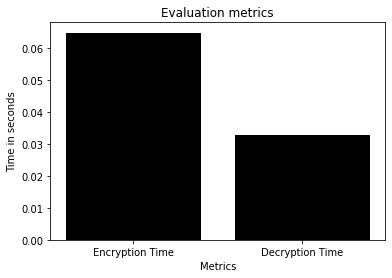

In [ ]:
from matplotlib import pyplot as plt    

print("Encryption Time :",et_a)
print("Decryption Time :",dt_a)
print("Throughtput :",thp)
Names = ['Encryption Time','Decryption Time']    
Time = [et_a,dt_a]   
plt.bar(Names,Time,color = 'black')    
plt.title('Evaluation metrics')    
plt.xlabel('Metrics')    
plt.ylabel('Time in seconds')    
plt.show()

# **CNN**

In [ ]:
#ZipFile Extraction

# with ZipFile("/content/drive/MyDrive/malimg_dataset.zip", "r") as f:
#   print("extracting started")
#   f.extractall()
#   print("done")

In [ ]:
# from keras.models import Sequential 

In [ ]:
# import tensorflow.compat.v1 as tf
# import tensorflow_datasets as tfds
# tf.disable_v2_behavior()
# tf.enable_eager_execution()

In [ ]:
path_root = "/content/drive/MyDrive/OTA_DATASET"

In [ ]:
#!pip install tensorflow
import numpy as np
import matplotlib as plt
#!pip install keras
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=282)

Found 545 images belonging to 2 classes.


In [ ]:
batches.class_indices

{'benign': 0, 'malicious': 1}

In [ ]:
imgs, labels = next(batches)

In [ ]:
imgs.shape

(282, 64, 64, 3)

In [ ]:
labels.shape

(282, 2)

In [ ]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
classes = batches.class_indices.keys()

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.2)

In [ ]:
X_train.shape

(225, 64, 64, 3)

In [ ]:
X_test.shape

(57, 64, 64, 3)

In [ ]:
y_train.shape

(225, 2)

In [ ]:
y_test.shape

(57, 2)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
num_classes = 2

In [ ]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(Conv2D(16, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(16, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(16, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
Malware_model = malware_model()

In [ ]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        2

In [ ]:
y_train.shape

(225, 2)

In [ ]:
y_train_new = np.argmax(y_train, axis=1)

In [ ]:
y_train_new

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1])

In [ ]:
history = Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Train on 225 samples, validate on 57 samples
Epoch 1/80
225/225 [==============================] - 2s 10ms/sample - loss: 0.7147 - acc: 0.4933 - val_loss: 0.6813 - val_acc: 0.5263
Epoch 2/80


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


225/225 [==============================] - 2s 8ms/sample - loss: 0.6843 - acc: 0.5644 - val_loss: 0.6692 - val_acc: 0.5263
Epoch 3/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.6735 - acc: 0.5378 - val_loss: 0.6629 - val_acc: 0.5263
Epoch 4/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.6548 - acc: 0.5511 - val_loss: 0.6321 - val_acc: 0.6140
Epoch 5/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.6259 - acc: 0.6800 - val_loss: 0.6788 - val_acc: 0.5263
Epoch 6/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.5696 - acc: 0.7556 - val_loss: 0.4908 - val_acc: 0.8421
Epoch 7/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.4600 - acc: 0.8311 - val_loss: 0.7195 - val_acc: 0.6842
Epoch 8/80
225/225 [==============================] - 2s 8ms/sample - loss: 0.4255 - acc: 0.8267 - val_loss: 0.4980 - val_acc: 0.8070
Epoch 9/80
225/225 [==============================] - 2s 8ms/sample - los

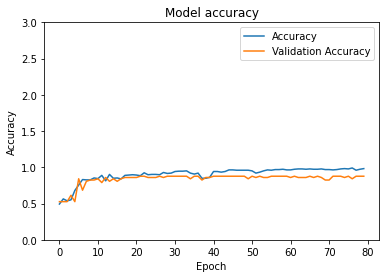

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

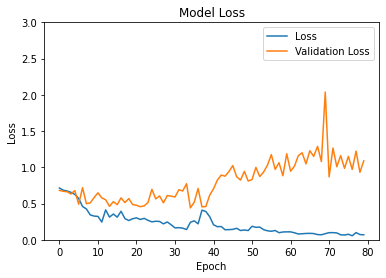

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

In [ ]:
loss, acc = Malware_model.evaluate(X_train, y_train,batch_size=16) 
print('Loss and accuracy', loss, '&', acc)

Loss and accuracy 0.05260011365585443 & 0.9822222


In [ ]:
pred=Malware_model.predict(X_train, batch_size=16)
pred=np.argmax(pred, axis=1)

#Original Labels

labels=np.argmax(y_train, axis=-1) 
from sklearn.metrics import classification_report 
print(classification_report (labels, pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.97      0.98       120

    accuracy                           0.98       225
   macro avg       0.98      0.98      0.98       225
weighted avg       0.98      0.98      0.98       225



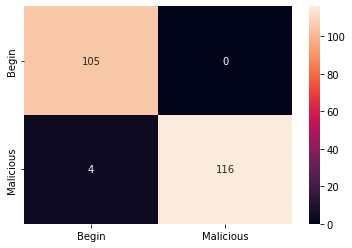

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Begin','Malicious'],yticklabels=['Begin','Malicious'])

RESNET50V2

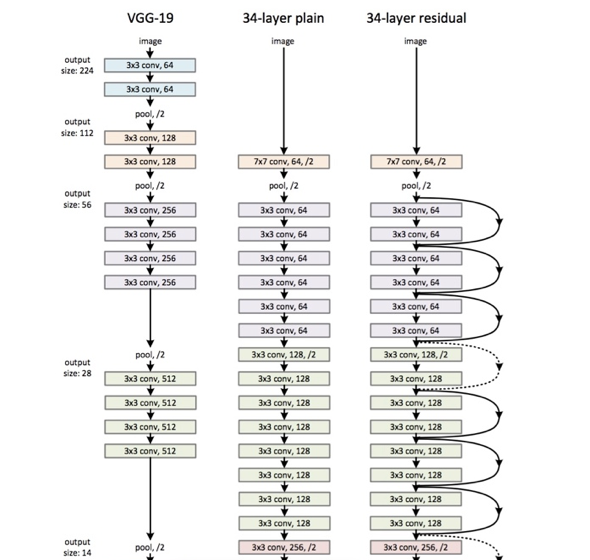

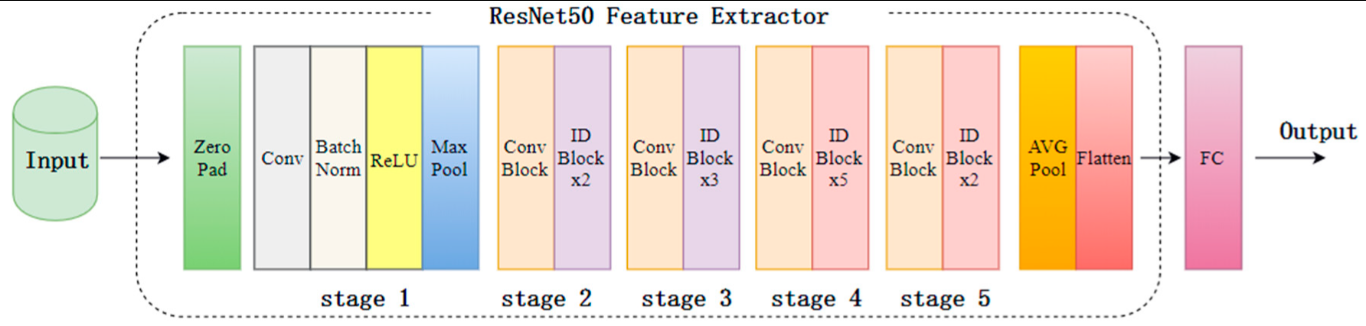

In [ ]:

resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(64,64,3),
    pooling='avg',
    classes=1000,
    #classifier_activation="softmax",
    )

for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Using Adam optimiser
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.004)
resnet_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Train on 225 samples, validate on 57 samples
Epoch 1/80
225/225 [==============================] - ETA: 0s - loss: 0.8515 - acc: 0.5467

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


225/225 [==============================] - 5s 23ms/sample - loss: 0.8515 - acc: 0.5467 - val_loss: 0.7469 - val_acc: 0.5439
Epoch 2/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.4720 - acc: 0.7956 - val_loss: 1.0984 - val_acc: 0.5439
Epoch 3/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.3603 - acc: 0.8711 - val_loss: 1.1948 - val_acc: 0.5614
Epoch 4/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.3177 - acc: 0.8933 - val_loss: 1.3200 - val_acc: 0.5789
Epoch 5/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.2152 - acc: 0.9156 - val_loss: 1.3621 - val_acc: 0.5789
Epoch 6/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.2114 - acc: 0.9067 - val_loss: 1.3789 - val_acc: 0.5789
Epoch 7/80
225/225 [==============================] - 4s 17ms/sample - loss: 0.2724 - acc: 0.8756 - val_loss: 1.4344 - val_acc: 0.5614
Epoch 8/80
225/225 [==============================] - 4s 17ms/samp

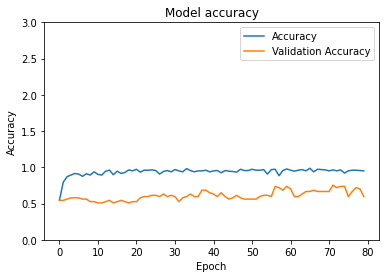

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

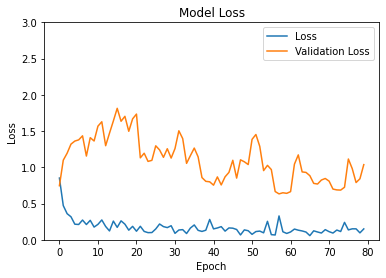

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

In [ ]:
loss, acc = resnet_model.evaluate(X_train,y_train,batch_size=16) 
print('Loss and accuracy', loss, '&', acc)

Loss and accuracy 1.1940970604949528 & 0.6533333


In [ ]:
pred=resnet_model.predict(X_train, batch_size=16)
pred=np.argmax(pred, axis=1)

#Original Labels

labels=np.argmax(y_train, axis=-1) 
from sklearn.metrics import classification_report 
print(classification_report (labels, pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


              precision    recall  f1-score   support

           0       0.58      0.92      0.71       105
           1       0.86      0.42      0.56       120

    accuracy                           0.65       225
   macro avg       0.72      0.67      0.64       225
weighted avg       0.73      0.65      0.63       225



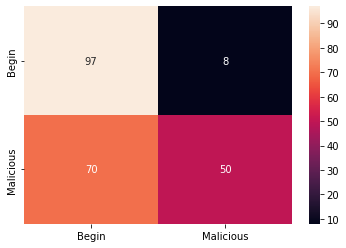

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Begin','Malicious'],yticklabels=['Begin','Malicious'])

MOBILENETV2

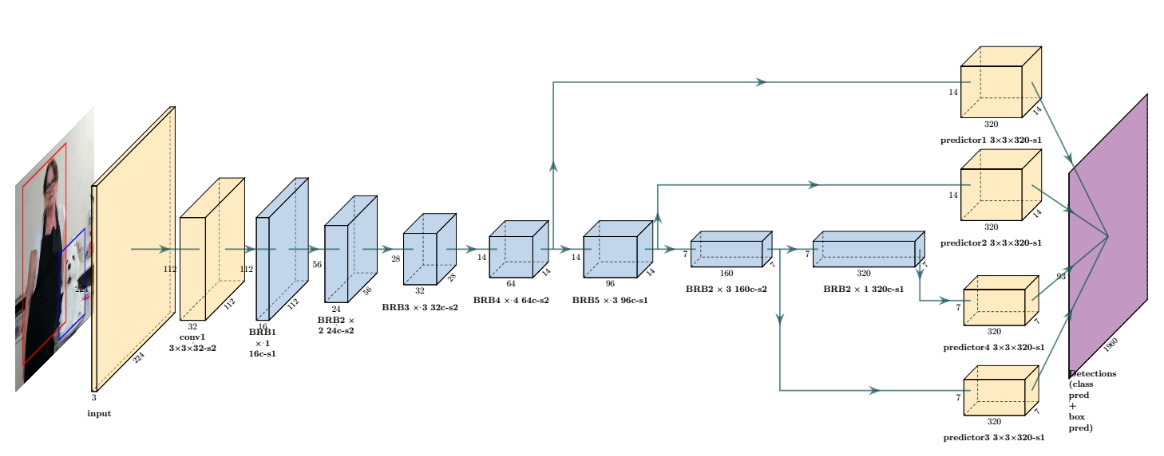

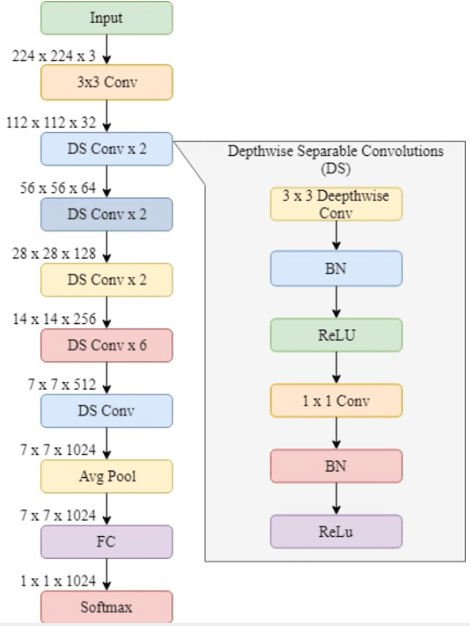

mobilenetv2_1.00_224

In [ ]:

mn_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    #alpha=1.0,
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(64,64,3),
    pooling='avg',
    classes=1000,
    #classifier_activation="softmax",
)


for layer in pretrained_model.layers:
  layer.trainable=False

mn_model.add(pretrained_model)
mn_model.add(Flatten())
mn_model.add(Dense(2,activation='softmax'))

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
mn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Using Adam optimiser
opt = Adam(lr=0.003)
mn_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
His = mn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Train on 225 samples, validate on 57 samples
Epoch 1/80
224/225 [============================>.] - ETA: 0s - loss: 0.9968 - acc: 0.5268

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


225/225 [==============================] - 3s 12ms/sample - loss: 0.9971 - acc: 0.5244 - val_loss: 1.4795 - val_acc: 0.5263
Epoch 2/80
225/225 [==============================] - 1s 5ms/sample - loss: 0.4851 - acc: 0.7644 - val_loss: 0.8058 - val_acc: 0.5614
Epoch 3/80
225/225 [==============================] - 1s 5ms/sample - loss: 0.7115 - acc: 0.7289 - val_loss: 1.1649 - val_acc: 0.5263
Epoch 4/80
225/225 [==============================] - 1s 6ms/sample - loss: 0.5623 - acc: 0.7867 - val_loss: 1.3478 - val_acc: 0.5439
Epoch 5/80
225/225 [==============================] - 1s 6ms/sample - loss: 0.3637 - acc: 0.8222 - val_loss: 0.8205 - val_acc: 0.5789
Epoch 6/80
225/225 [==============================] - 1s 6ms/sample - loss: 0.2853 - acc: 0.8933 - val_loss: 1.3380 - val_acc: 0.5263
Epoch 7/80
225/225 [==============================] - 1s 6ms/sample - loss: 0.3461 - acc: 0.8400 - val_loss: 1.1199 - val_acc: 0.5439
Epoch 8/80
225/225 [==============================] - 1s 6ms/sample - lo

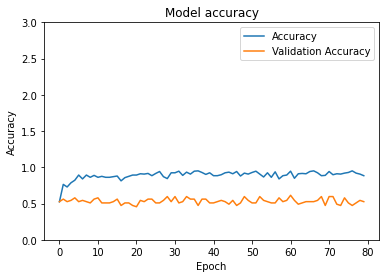

In [ ]:
import matplotlib.pyplot as plt
plt.plot(His.history['acc'])
plt.plot(His.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

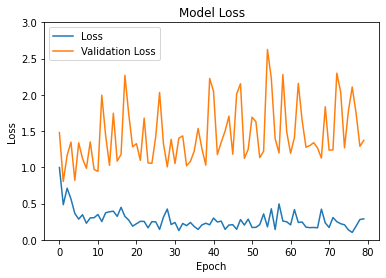

In [ ]:
import matplotlib.pyplot as plt
plt.plot(His.history['loss'])
plt.plot(His.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.xticks(np.arange(0, 90, 10))
plt.ylim(0, 3)
plt.show()

In [ ]:
loss, acc = mn_model.evaluate(X_train, y_train,batch_size=16) 
print('Loss and accuracy', loss, '&', acc)

Loss and accuracy 1.3293412155575222 & 0.56


In [ ]:
pred=mn_model.predict(X_train, batch_size=16)
pred=np.argmax(pred, axis=1)

#Original Labels

labels=np.argmax(y_train, axis=-1) 
from sklearn.metrics import classification_report 
print(classification_report (labels, pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


              precision    recall  f1-score   support

           0       0.54      0.42      0.47       105
           1       0.57      0.68      0.62       120

    accuracy                           0.56       225
   macro avg       0.56      0.55      0.55       225
weighted avg       0.56      0.56      0.55       225



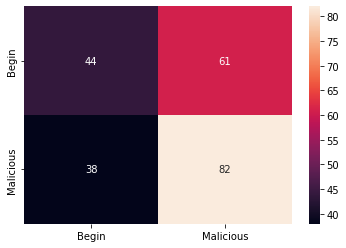

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Begin','Malicious'],yticklabels=['Begin','Malicious'])